In [107]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy.sparse
import scipy.linalg

# Poisson Equation

Consider the Diriclet problem for the poisson equation in two dimension, $\textbf{x} = (x,y) \in \Omega \subset R^2$

$$
\begin{cases}
    - \Delta u(\textbf{x}) = f(\textbf{x}) \;\;\;\;\;\;\;\;\;  \textbf{x} \in \Omega \\
    u(\textbf{x}) = g(\textbf{x}) \;\;\;\;\;\;\;\;\;  \textbf{x} \in \partial \Omega
\end{cases}
$$
with
$$
 \Delta u(\textbf{x}) = \frac{\partial^2 u(\textbf{x})}{\partial x^2} + \frac{\partial^2 u(\textbf{x})}{\partial y^2}
$$

# Finite difference for two dimensional problems

The idea behind finite difference relies approximating the partial derivatives that are present in the PDE by the incremental ratios computed on a suitable grid.  

The first step therefore consist of introducing computational grid. Assume for semplicity thta $\Omega$ is the rectangle $(a,b) \times (c,d)$:

- introduce a partition $[a,b]$ in subintervals $(x_k, x_{k+1})$ for $k=0, \dots, N_x$, with $x_0=a$ and $x_{N_x +1} = b$. Let us denote by $\Delta_x = {x_0,\dots, x_{N_x+1}}$ the set of end-points of such intervals and by $h_x = max (x_{k+1} - x_k)$ their maximum length.
-  introduce a discretization of the y-axis $\Delta_y = {y_0,\dots, y_{N_y+1}}$ with $y_0=c$ and $y_{N_y +1} = d$ and set $h_y = max (y_{l+1} - y_l)$
- the cartesian product $\Delta_h = \Delta_x \times \Delta_y$ provides the computational grid on $\Omega$ and $h=max \{ h_x,h_y \}$ is the charactersitic measure of the grid-size. 

Note that we the above setting with $k=1,\dots,N_x$ and $l = 1,\dots, N_y$ we indicate the internal node of the grid, while with $k=0,N_x+1$ and $l = 0, N_y+1$ the bounadry nodes

We are looking for values $u_{k,l}$ which approximate $u(x_k, y_l)$. 
 
We will assume for semplicity that the nodes be uniformly spaced, that is $h_x = h_y$. In the case of function of two variables, the second order derivative is approximated by the following incremental ratios:
$$
\delta_x^2 u_{k,l} = \frac{u_{k-1,l} -2u_{k,l}+u_{k+1,l}}{h_x^2} \\
\delta_y^2 u_{k,l} = \frac{u_{k,l-1} -2u_{k,l}+u_{k,l+1}}{h_y^2}
$$

They are second order accurate w.r.t $h_x$ and $h_y$ respectively.

Replacing it in the laplacian in the Poisson equation formula and requiring that the PDE must be satisfied in all the internal nodes of $\Delta_h$, we obtain the following set of equation:

$$
 - (\delta_x^2 u_{k,l} + \delta_y^2 u_{k,l}) = f_{k,l}  \;\;\;\;\;\;\;\;\;k=1,\dots,N_x, \;\;\;\; l= 1,\dots, N_y
$$
where $f_{k,l} = f(x_k, y_l)$
where $ \partial \Delta_h$ indicates the set of nodes belonging to the boundary $\partial \Omega$ of $\Omega$. If we make further assumption that the computational grid is uniform in both cartesian directions, $h_x=h_y=h$ we obtain

$$
  (u_{k-1,l} + u_{k,l-1} - 4u_{k,l} + u_{k,l+1} + u_{k+1,l}) = - h^2 f_{k,l}  ;\;\;\;k=1,\dots,N_x, \;\;\;\; l = 1,\dots, N_y
$$

This is called the __five point scheme for the Laplace operator__.
We note that the unknown associated with the boundary nodes can be eleminated using the diriclet condition and therefore the above system involves only $N = N_x N_y$ unknowns.

We must add the equations that enforce the diriclet data at the boundary, which are
$$
    u_{k,l} = g_{k,l} \;\;\;\;\;\; \forall k,l \;\;s.t \;\;(x_k, x_l) \in \partial \Delta_h
$$

## Matrix form
The element of the matrix $u_{k,l}$ are rearranged by tscaking column on top of each other to form a vector. Starting at the bottom left corner and traversing in the y-direction first, and subsequently in the x-direction we get the following system of equations
$$
A\textbf{u}_h = - h^2 \textbf{f} + \textbf{b}
$$
where 
- $A \in R^{N \times N}$ tridiagonal block matrix made of the following block

$$
    A = 
 \begin{pmatrix}
T & I &  &  &  & &  \\
I & T & I &  &  &  &\  \\
 &  &  &\ddots & & & \\
 &  &  &  I & T & I  \\
 &  &  &  & I & T & I \\
 &  &  &  &  & I & T 
\end{pmatrix}
$$
 here $I \in R^{N_x \times N_x}$ is an identity matrix and $T \in R^{N_x \times N_x}$ is a tridiagonal matrix

$$
    T =
\begin{pmatrix}
4 & 1 &  &  &  & &  \\
1 & 4 & 1 &  &  &  &\  \\
 &  &  &\ddots & & & \\
 &  &  &  1 & 4 & 1 \\
 &  &  &  & 1 & 4 & 1 \\
 &  &  &  &  & 1 & 4 
\end{pmatrix}

$$
A is symmetric, positive definite and so non singular. Thus we can cocnlude that the finite difference system admits admits an unique solution $\textbf{u}_h$. 
It is worth pointing out that $A$ is ill-conditioned: it is condition number grows like $h^{-2}$ as $h$ tends to zero.

- $\textbf{u}_h \in R^N $ is our unknown solution
$$
\begin{align*}

    \textbf{u}_h = 
    \begin{pmatrix}
        \textbf{u}_{1} \\
        \textbf{u}_{2} \\
        \vdots \\
        \textbf{u}_{k} \\
        \vdots \\
        \textbf{u}_{Nx} \\
    \end{pmatrix}
\;\; \;\;\;\;\;\;\;
\textbf{u}_k = 
    \begin{pmatrix}
        u_{1,k} \\
        u_{2,k} \\
        \vdots \\
        u_{Ny,k} \\
    \end{pmatrix}
\;\;\;\; k = 1,\dots,N_x
\end{align*}

$$
here each $\textbf{u}_k$ represent a column of the matrix composed by the internal nodes

<!---
$$
    \textbf{u}_h = 
    \begin{pmatrix}
        u_{1,1} \\
        u_{2,1} \\
        \vdots \\
        u_{Ny,1} \\
        u_{1,2} \\
        \vdots \\
        u_{Ny,2} \\
        \vdots \\
        u_{1,Nx} \\
        \vdots \\
        u_{Ny,Nx} \\
    \end{pmatrix}
$$
-->

- $\textbf{f} \in R^N $ is our source terms vector
$$
\begin{align*}

    \textbf{f} = 
    \begin{pmatrix}
        \textbf{f}_{1} \\
        \textbf{f}_{2} \\
        \vdots \\
        \textbf{f}_{k} \\
        \vdots \\
        \textbf{f}_{Nx} \\
    \end{pmatrix}
\;\; \;\;\;\;\;\;\;
\textbf{f}_k = 
    \begin{pmatrix}
        f_{1,k} \\
        f_{2,k} \\
        \vdots \\
        f_{Ny,k} \\
    \end{pmatrix}
\;\;\;\; k = 1,\dots,N_x
\end{align*}

$$

- $\textbf{b} = \textbf{b}_{top/bottom} + \textbf{b}_{left/right}\in R^N $ is the vector of boundary conditions, where

$$
    \textbf{b} = 
    \begin{pmatrix}
        \textbf{b}_{1} \\
        \textbf{b}_{2} \\
        \vdots \\
        \textbf{b}_{k} \\
        \vdots \\
        \textbf{b}_{Nx} \\
    \end{pmatrix}
    \;\; \;\;\;\;\;\;\;

    \textbf{b}_k =  \textbf{b}_{top/bottom, k} + \textbf{b}_{left/right, k}
    \;\;\;\; k = 1,\dots,N_x
$$
and

$$
    \textbf{b}_k =  \textbf{b}_{top/bottom, k} + \textbf{b}_{left/right, k} = 

    \begin{cases}
\;\;\;
 -  \begin{pmatrix}
        \textbf{g}_{0,k} \\
        \vdots \\
        0 \\
        \vdots \\
        \textbf{g}_{N_{y+1},k} \\
    \end{pmatrix} 
 \;\;\; -
       \begin{pmatrix}
        0 \\
        \vdots \\
        0 \\
        \vdots \\
        0 \\
    \end{pmatrix} 

    \;\;\;\;\;\;\;\;\; k=2,\dots,N_{x-1}  \\

\\
\;\;\;
    -  \begin{pmatrix}
        \textbf{g}_{0,1} \\
        \vdots \\
        0 \\
        \vdots \\
        \textbf{g}_{N_{y+1},1} \\
    \end{pmatrix} 
 \;\;\; -
       \begin{pmatrix}
        \textbf{g}_{1,0} \\
        \vdots \\
        \textbf{g}_{l,0} \\
        \vdots \\
        \textbf{g}_{N_y,0}\\
    \end{pmatrix} 

    \;\;\;\;\;\;\;\;\; k=1  \\
\\
\;\;\;
     -  \begin{pmatrix}
        \textbf{g}_{0,N_x} \\
        \vdots \\
        0 \\
        \vdots \\
        \textbf{g}_{N_{y+1},N_x} \\
    \end{pmatrix} 
 \;\;\; -
       \begin{pmatrix}
        \textbf{g}_{1,N_{x+1}} \\
        \vdots \\
        \textbf{g}_{l,N_{x+1}} \\
        \vdots \\
        \textbf{g}_{N_y,N_{x+1}}\\
    \end{pmatrix} 

    \;\;\;\;\;\;\;\;\; k=N_x  \\

    \end{cases}
$$

## Example

Consider the following problem setting 
$$ 
\Omega = (0,1)^2 \\    
f(x,y) = 8\pi sin(2\pi x)*cos(2\pi y) \\    
g(0,y) = g(1,y) = 0 \\  
g(x,0) =g(x,1) = sin(2\pi x) \;\;\; 0<x<1  
$$

In [399]:
# Parameters
n_x = n_y = 20
n = n_x*n_y
h = h_x = h_y = 1/n
a = 0
b = 1
c = 0
d = 1

# Source term
def f(x,y):
    return 8*np.pi**2*np.sin(2*np.pi*x)*np.cos(2*np.pi*y)

# Boundary terms
def g_top_bottom(x):
    return np.sin(2*np.pi*x)

def g_left_right():
    return 0


## Define the Grid

In [400]:
# Define the grid s.t. x_0 = a, x_n+1 = b, y_0 = c, y_n+1 = d
x = np.linspace(a, b, n_x+1+1)
y = np.linspace(c, d, n_y+1+1)
xv, yv = np.meshgrid(x, y)

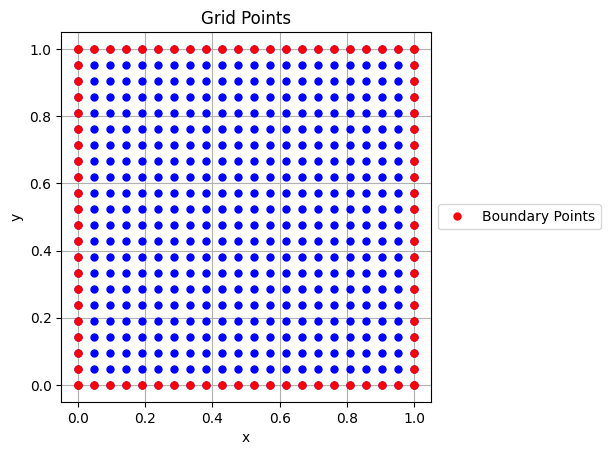

In [401]:
# Plot the grid
plt.plot(xv, yv, marker='o', linestyle='none', color='blue', markersize=5)

# Plot the boundary points
plt.plot(xv[:, 0], yv[:, 0], marker='o', linestyle='none', color='red', markersize=5, label='Boundary Points')  # Left boundary
plt.plot(xv[:, -1], yv[:, -1], marker='o', linestyle='none', color='red', markersize=5)  # Right boundary
plt.plot(xv[0, :], yv[0, :], marker='o', linestyle='none', color='red', markersize=5)  # Top boundary
plt.plot(xv[-1, :], yv[-1, :], marker='o', linestyle='none', color='red', markersize=5)  # Bottom boundary

plt.xlabel('x')
plt.ylabel('y')
plt.title('Grid Points')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

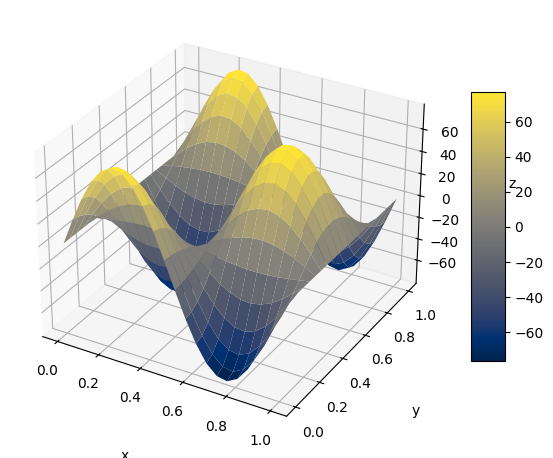

In [402]:
# Plot the source term f
z = f(xv, yv)
fig = plt.figure(figsize = (7,7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xv, yv, z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)
plt.show()

## Define the boundary condition

In [403]:
# Set the boundary value of above defined approximated solution to the known boundary value
u_h = np.zeros((n_x+1+1,n_y+1+1))

# Left and Right boundary
for i in np.arange(n_x):
    u_h[i, 0] = g_left_right() # Left
    u_h[i, n_x+1] = g_left_right() # Right

# Top and bottom boundary
for j in np.arange(n_x):
    u_h[0, j] = g_top_bottom(x[j]) # Bottom
    u_h[n_y+1, j] = g_top_bottom(x[j]) # Top


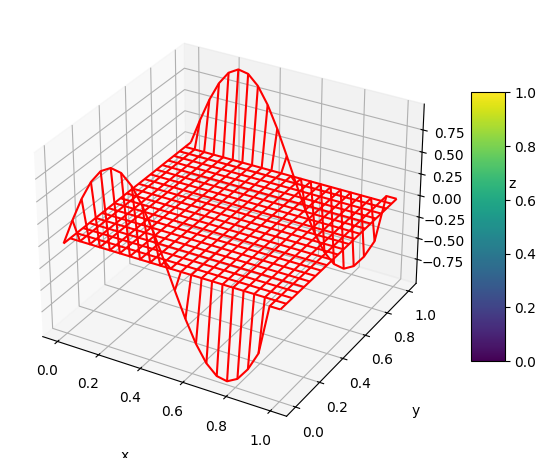

In [404]:
# Plot the boundary value
fig = plt.figure(figsize = (7,7))
ax = plt.axes(projection='3d')
surf = ax.plot_wireframe(xv, yv, u_h,color='r')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)
plt.show()

## Implement the finite difference solver

In [405]:
# Compute A
def compute_A(h, n_x, n_y):

    D = np.eye(n_x)
    k = [np.ones(n_x-1),4*np.ones(n_x), np.ones(n_x-1)]
    T = scipy.sparse.diags(k, [-1,0,1]).toarray()

    I1 = np.eye(n_y)
    I2 = np.eye(n_y, k=1)
    I3 = np.eye(n_y, k=-1)

    A1 = np.kron(I1, T)
    A2 = np.kron(I2, D)
    A3 = np.kron(I3, D)
    A = A1 + A2 + A3

    return A

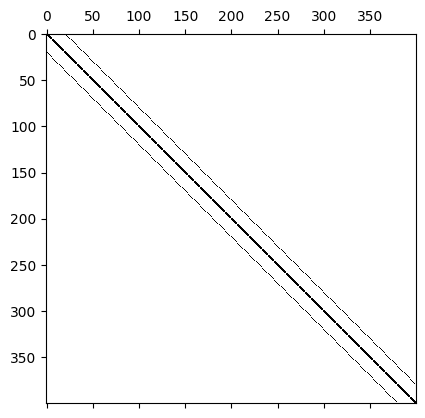

In [406]:
A = compute_A(h, n_x,n_y)
plt.spy(A)

In [408]:
# Compute the source vector f
def compute_f(n,n_x,n_y):
    fv = np.zeros(n)

    for i in np.arange(n_x):
        for j in np.arange(n_y):
            fv[i + n_y*j] = f(x[i+1], y[j+1])

    return fv 

# Compute the boundary vector b = b_top/bottom + b_left/right 
def compute_b(n, n_x, n_y):
    b = np.zeros(n_x)
    
    b_left_right=np.zeros(n)
    for i in range (0,n_y):
        b_left_right[i]=g_left_right() # Left Boundary
        b_left_right[i+n_y*(n_x-1)]= g_left_right() # Right Boundary
      
    b_top_bottom=np.zeros(n)
    for j in range (0,n_x):
        b_top_bottom[n_x*j]=g_top_bottom(x[j+1]) # Bottom Boundary
        b_top_bottom[n_x-1+n_x*j]=g_top_bottom(x[j+1]) # Top Boundary
    
    b=b_left_right+b_top_bottom

    return b

In [409]:
def discrete_poisson_problem_solver(a,b,c,d,h, n, n_x, n_y):
    A = compute_A(h, n_x, n_y,)
    b = compute_b(n, n_x, n_y)
    fv = compute_f(n, n_x, n_y)

    u_h = np.linalg.solve(A, -h**2*fv-b)

    return u_h

## Solve the system

In [411]:
# Solve the system
sol = discrete_poisson_problem_solver(a,b,c,d,h,n,n_x,n_y)

# Reshape the solution to 2d matrix again
u_h[1:n_x+1, 1:n_y+1] = sol.reshape((n_x,n_y))

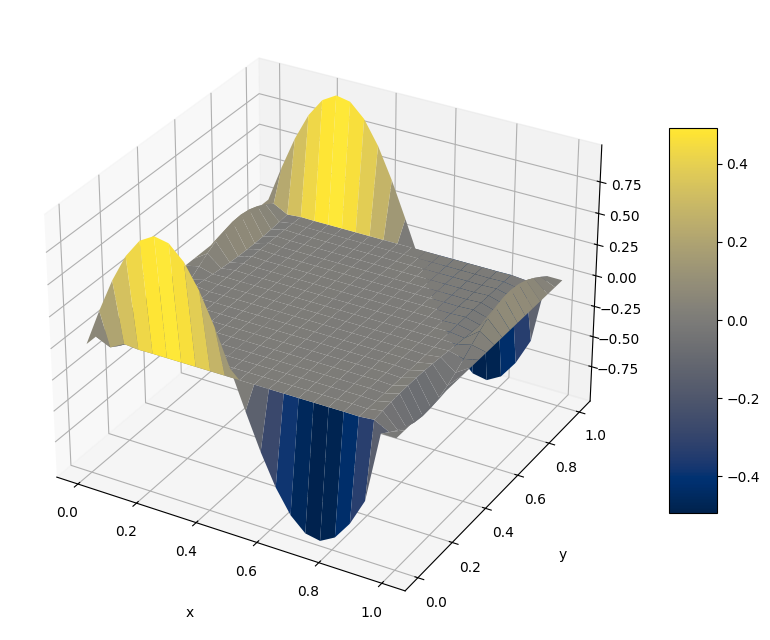

In [412]:
# Visualize the result
# Plot the source term f
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xv, yv, u_h, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)
plt.show()

# Appendix
## A note on indexing

## Additional figure

# Rereferences:
- Scientific Computing with MATLAB and Octave, A.Quarteroni, F.Saleri
- Numerical Methods for Differential Equations with Python, J.S. Butler https://johnsbutler.netlify.app/files/Teaching/Numerical_Analysis_for_Differential_Equations.pdf
- https://john-s-butler-dit.github.io/NumericalAnalysisBook/Chapter%2009%20-%20Elliptic%20Equations/903_Poisson%20Equation-Boundary.html
- Numerical Solution of the Poisson Equation Using Finite Difference Matrix Operators, Mohammad Asif Zaman